### Overview of Linear and Integer Programming 

Linear Programming solves a continuous linear system which is formulated as an inequality (or equality)

Methods for solving are the primal or dual simplex method , which we will go in further detail below

Integer Linear Programming is the discrete formulation of such, which are typically solved via branch-and-bound methods 

In [39]:
from pulp import *
import numpy as np
import matplotlib.pyplot as plt

In [3]:
solver_list = pl.listSolvers(onlyAvailable=True)
solver_list

['COIN_CMD']

### Test Problem

Here we solve a LP approximation to a trigonometric function via taylor approximation 

In [81]:
x=np.linspace (-1,1,50)
features=np.array([x**0,x**1,x**2,x**3]).T
y=np.sin(x)+4*np.random.rand(50)

### OLS Solution

In [82]:
sol,resid,rank,s=np.linalg.lstsq(features,y)
sol

/home/jbohn/miniconda3/envs/research/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


array([ 2.27777129,  0.31429397, -0.80235372,  0.50425639])

Text(0.5, 1.0, 'OLS Solution, Residuals of 72.97')

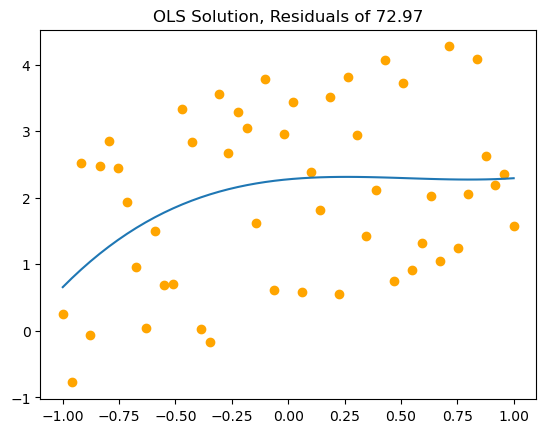

In [83]:
y_hat=np.matmul(features,sol)
plt.plot(x,y_hat)
plt.scatter(x,y,color='orange')
plt.title(f"OLS Solution, Residuals of {round(resid[0],2)}")

### Loosen to Inequality 

We wish to numerically minimize solution s.t. our estimates predicts less than all observations

In [84]:
problem=LpProblem("OLS_Example", LpMinimize)

x0=LpVariable("Constant")
x1=LpVariable("Order_1")
x2=LpVariable("Order_2")
x3=LpVariable("Order_3")

estimates=np.array([x0,x1,x2,x3])
problem+=np.sum(y-np.dot(features,estimates)) # objective

for i,row in enumerate(features):
    problem+=row[0]*x0+row[1]*x1+row[2]*x2+row[3]*x3 <=y[i]

problem.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.8 
Build Date: May  6 2022 

command line - cbc /tmp/70ef6f63ea15400884f2ffd6d3a3df3e-pulp.mps timeMode elapsed branch printingOptions all solution /tmp/70ef6f63ea15400884f2ffd6d3a3df3e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 55 COLUMNS
At line 260 RHS
At line 311 BOUNDS
At line 316 ENDATA
Problem MODEL has 50 rows, 4 columns and 200 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 50 (0) rows, 4 (0) columns and 200 (0) elements
0  Obj 0 Primal inf 1.7273932 (3) Dual inf 3.2396953 (2) w.o. free dual inf (0)
5  Obj -12.770307
Optimal - objective value -12.770307
Optimal objective -12.77030708 - 5 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00



1

In [85]:
print("Status:", LpStatus[problem.status])

Status: Optimal


In [86]:
values=[]
for v in problem.variables():
    print(v.name, "=", v.varValue)
    values.append(v.varValue)

Constant = 0.18925282
Order_1 = 1.0841145
Order_2 = 0.19067721
Order_3 = 0.11425892


Text(0.5, 1.0, 'OLS Solution, Residuals of 234.79')

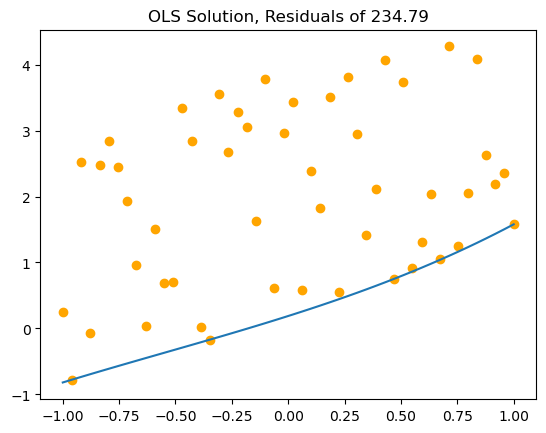

In [87]:
y_hat=np.matmul(features,values)
plt.plot(x,y_hat)
plt.scatter(x,y,color='orange')
resid=np.sum((y-y_hat)**2)
plt.title(f"OLS Solution, Residuals of {round(resid,2)}")

### Dual Viewpoint

In [88]:
problem=LpProblem("OLS_Example", LpMinimize)

x0=LpVariable("Constant")
x1=LpVariable("Order_1")
x2=LpVariable("Order_2")
x3=LpVariable("Order_3")

estimates=np.array([x0,x1,x2,x3])
problem+=np.sum(np.dot(features,estimates)-y) # objective

for i,row in enumerate(features):
    problem+=row[0]*x0+row[1]*x1+row[2]*x2+row[3]*x3 >=y[i]

problem.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.8 
Build Date: May  6 2022 

command line - cbc /tmp/24b5a006f59e4630b52abb31e1a5bc4e-pulp.mps timeMode elapsed branch printingOptions all solution /tmp/24b5a006f59e4630b52abb31e1a5bc4e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 55 COLUMNS
At line 260 RHS
At line 311 BOUNDS
At line 316 ENDATA
Problem MODEL has 50 rows, 4 columns and 200 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 50 (0) rows, 4 (0) columns and 200 (0) elements
0  Obj 0 Primal inf 2857.903 (47) Dual inf 3.2396953 (2) w.o. free dual inf (0)
6  Obj 190.9738
6  Obj 6.460772e+12 Primal inf 3.0448335e+13 (14) Dual inf 1.2335644e+15 (4) w.o. free dual inf (3)
8  Obj 185.56931 Dual inf 0.43163968 (1)
9  Obj 185.41586
Optimal - objective value 185.41586
Optimal objective 185.415857 - 9 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):  

1

In [89]:
print("Status:", LpStatus[problem.status])

Status: Optimal


In [90]:
values=[]
for v in problem.variables():
    print(v.name, "=", v.varValue)
    values.append(v.varValue)

Constant = 3.8776765
Order_1 = 0.90081797
Order_2 = -0.48815334
Order_3 = 0.0055193762


Text(0.5, 1.0, 'OLS Solution, Residuals of 221.1')

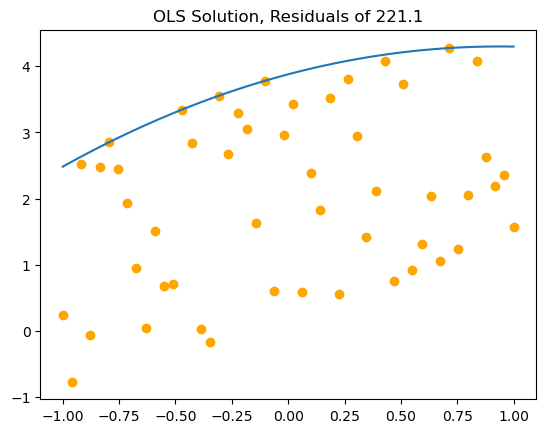

In [91]:
y_hat=np.matmul(features,values)
plt.plot(x,y_hat)
plt.scatter(x,y,color='orange')
resid=np.sum((y-y_hat)**2)
plt.title(f"OLS Solution, Residuals of {round(resid,2)}")